In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Read the dataset

In [2]:
fifa = pd.read_csv(r"C:\Users\Parva\Downloads\27th\27th\Seaborn\FIFA.csv")
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
fifa.shape

(18207, 89)

# Exploratory Data Analysis

In [4]:
fifa.head()  # preview the dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
fifa.info()      # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
fifa['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [7]:
fifa.isnull().any().sum()

76

# comment
* this dataset contains 89 variables 
* out of the 89 variables, 44 are numerical variable. 38 are float datatype and remaining 6 are of int datatype.
* the remaining 6 are of int datatype.

# Explore Age variable

#### visualize distribution of age variable with seaborn distplot() function

* seaborn distplot()function flexibilty plot a univariate distribution of observations.
* this function combines the matplotlib hist function(with automatic calculation of a good default bin size) wirh the seborn kdeplot() and rugplot()functions.
* so,lets visualize the distribution of age variable with seaborn distplot()function.

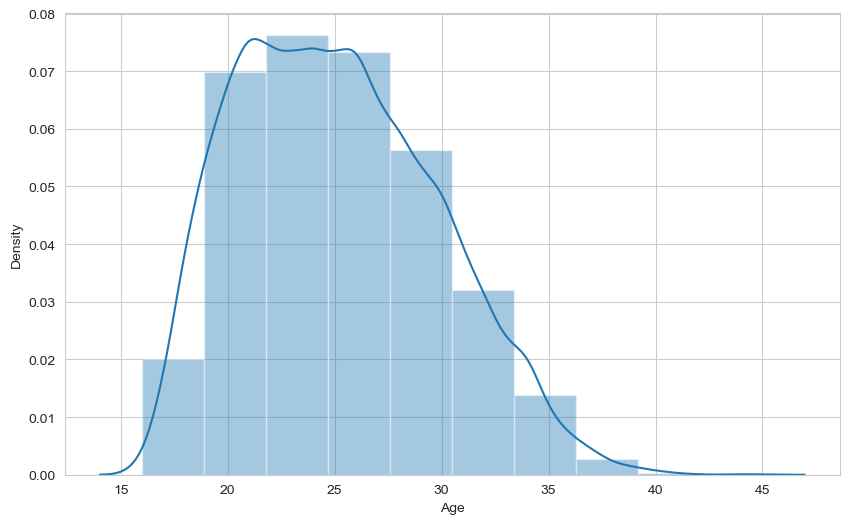

In [8]:
f,ax = plt.subplots(figsize=(10,6))
x =fifa['Age']
ax = sns.distplot(x, bins=10)
plt.show()

## comment
* it can be seen that the age variable is slightly positively skewed.

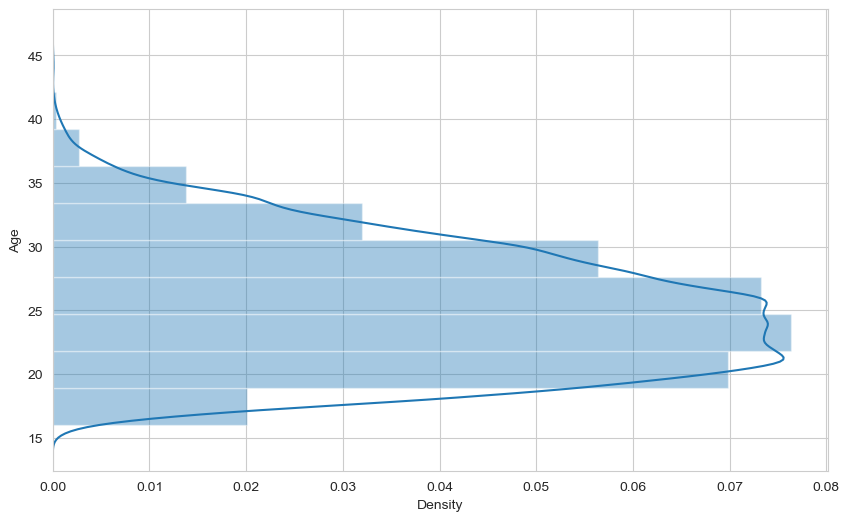

In [9]:
f,ax = plt.subplots(figsize=(10,6))
x =fifa['Age']
ax = sns.distplot(x, bins=10,vertical= True)
plt.show()

#### we can use pandas series object to get an informative axis label as follows-

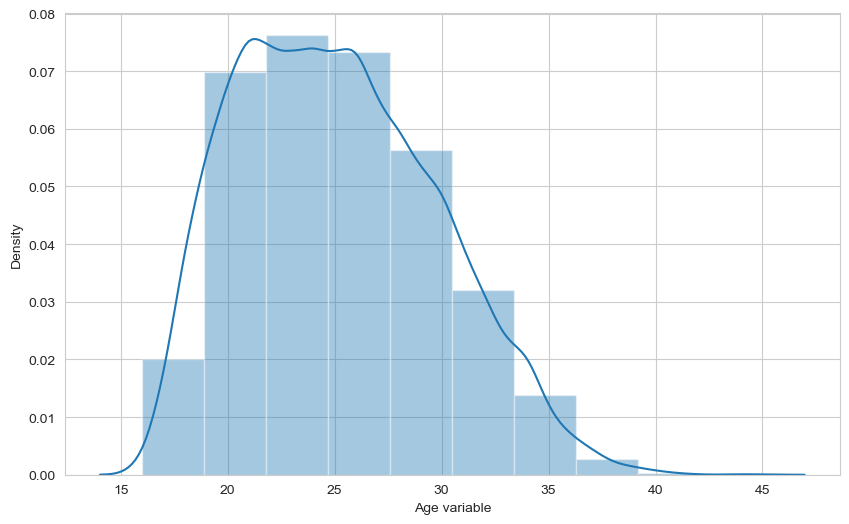

In [10]:
f,ax =plt.subplots(figsize=(10,6))
x =fifa['Age']
x = pd.Series(x, name="Age variable")
ax= sns.distplot(x,bins=10)
plt.show()

# seaborn kernal Density Estimation (kde)plot
* the kernal density estimate (kde)plot is a useful tool for plotting the shape of a distribution.
* seaborn kdeplot is another seaborn plotting function that fits and plot a univariate AND bivariate kernal density estimate.
* like the histogram, the kde plots encode the density of observations on one axis with mheight along the other axis.

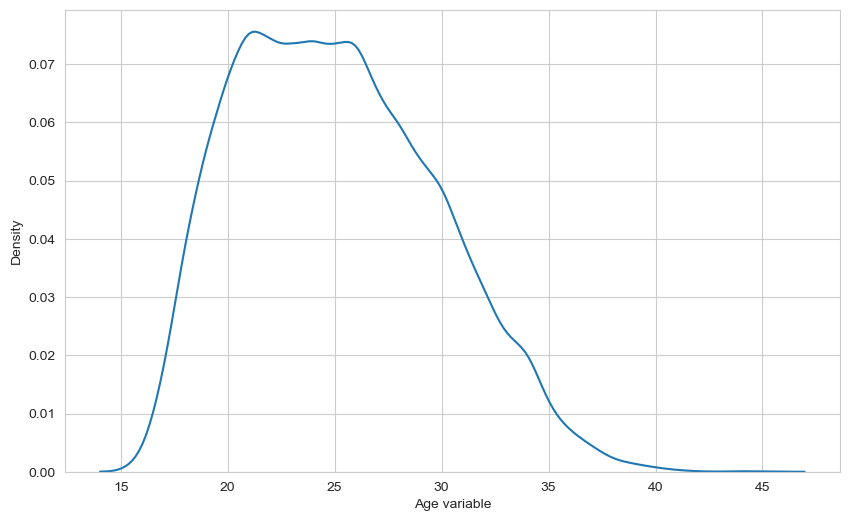

In [11]:
f,ax =plt.subplots(figsize=(10,6))
x =fifa['Age']
x = pd.Series(x, name="Age variable")
ax= sns.kdeplot(x)
plt.show()

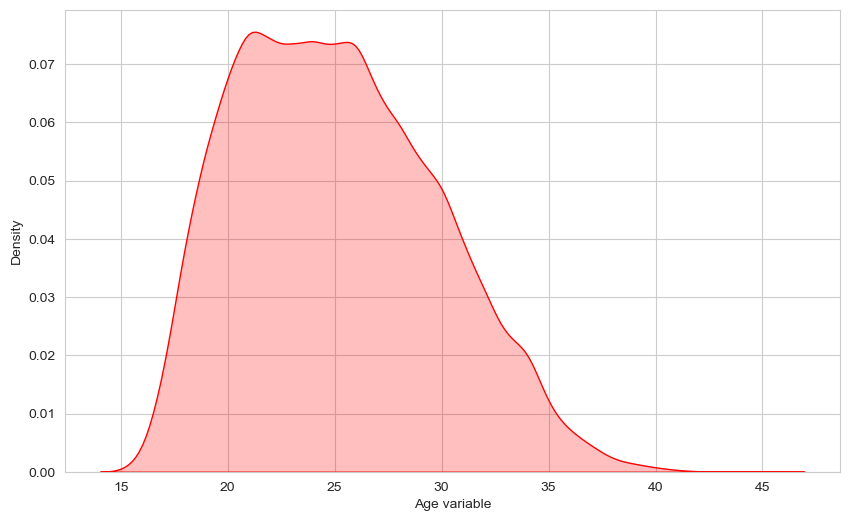

In [12]:
f,ax =plt.subplots(figsize=(10,6))
x =fifa['Age']
x = pd.Series(x, name="Age variable")
ax= sns.kdeplot(x,shade=True,color='r')
plt.show()

# Histogram
* Histogram represents the distribution of the data by forming bins along with the range of the data and then drawing bars to show the number of observations that fall in each bin
* A hist() function already exists in  matplotlib

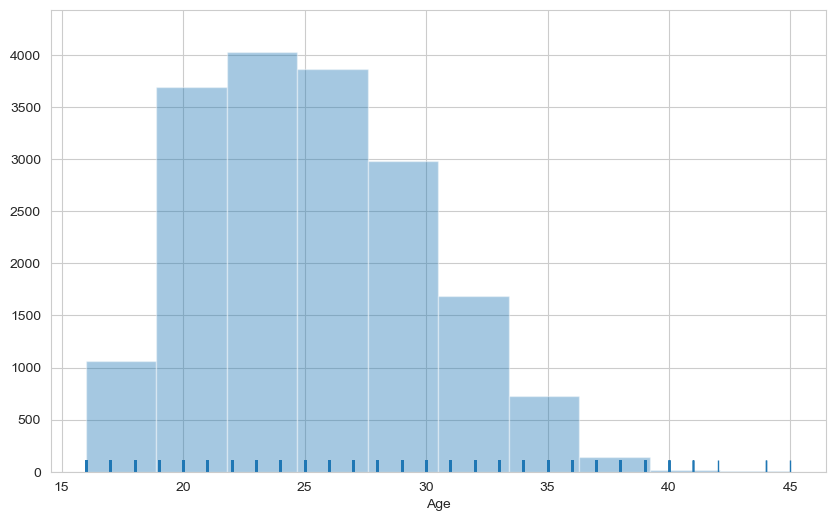

In [13]:
f,ax = plt.subplots(figsize=(10,6))
x =fifa['Age']
ax = sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

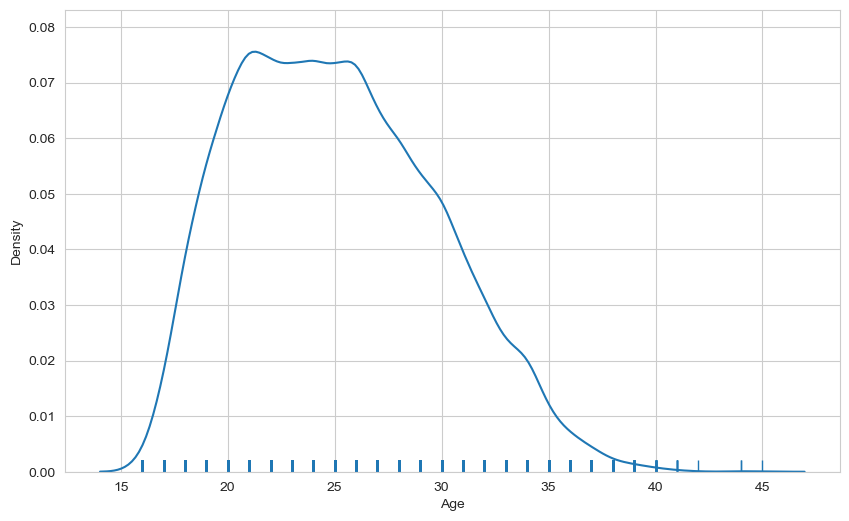

In [14]:
f,ax = plt.subplots(figsize=(10,6))
x =fifa['Age']
ax = sns.distplot(x,hist=False,rug=True,bins=10)
plt.show()

# Explore Preferred Foot variable
### check number of unique valkues in prefferred foot variable

In [15]:
fifa['Preferred Foot'].nunique()

2

* we can see that there are two types of unique values in prefered foot variable.

## check frequency distribution of values in prefferred foot variable

In [16]:
fifa['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

* the preferred foot variable contains two types - right and left in that the frequency of right is 13948 and the frequency of the left is 4211.

# visualize distribution of values with seaborn countplot() function

* A countplot shows the counts of the observations in each categorical bin using bars.
* it can be thought of as a histogram across a categorical , instead of quantitative variable.
* this function always treats one of the variables as categorical and draws data at ordinal positions(0,1,....n) on the relevant axis, even when the data has a numeric or data type.

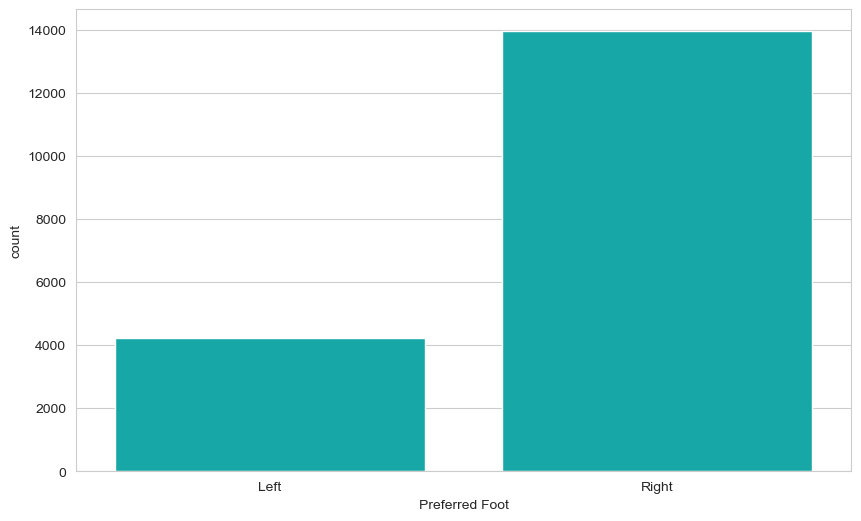

In [17]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Preferred Foot',data=fifa,color='c')
plt.show()

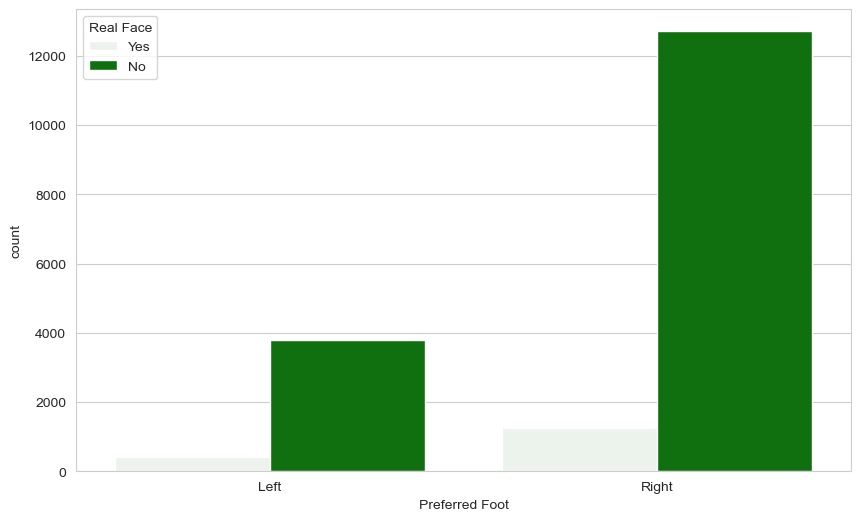

In [18]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Preferred Foot',hue='Real Face',data=fifa,color='g')
plt.show()

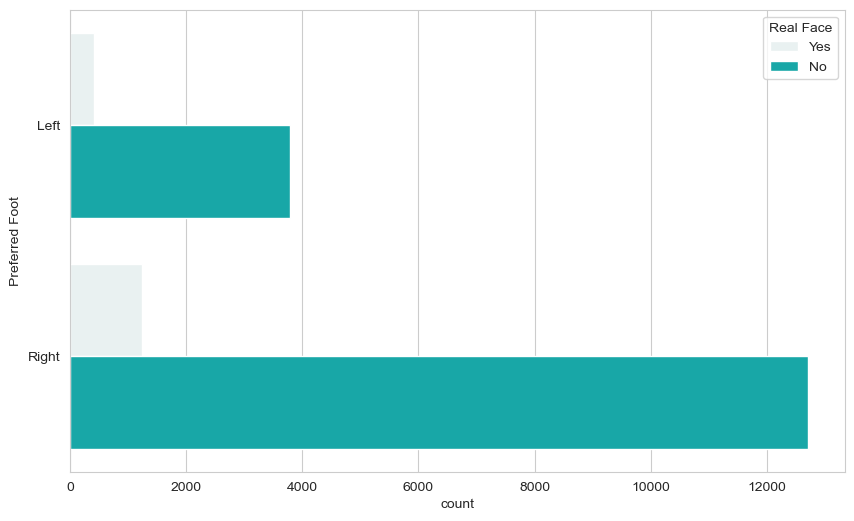

In [19]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(y='Preferred Foot',hue='Real Face',data=fifa,color='c')
plt.show()

# catplot()

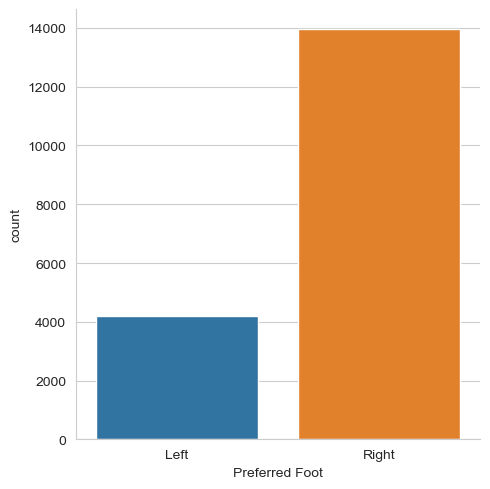

In [20]:
sns.catplot(x='Preferred Foot',kind='count',data=fifa)

## Explore International Reputation variable
* check the number of unique values in International Reputation variable

In [21]:
fifa['International Reputation'].nunique()

5

## check the frequency distribution of International Reputation variable

In [22]:
fifa['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

# stripplot

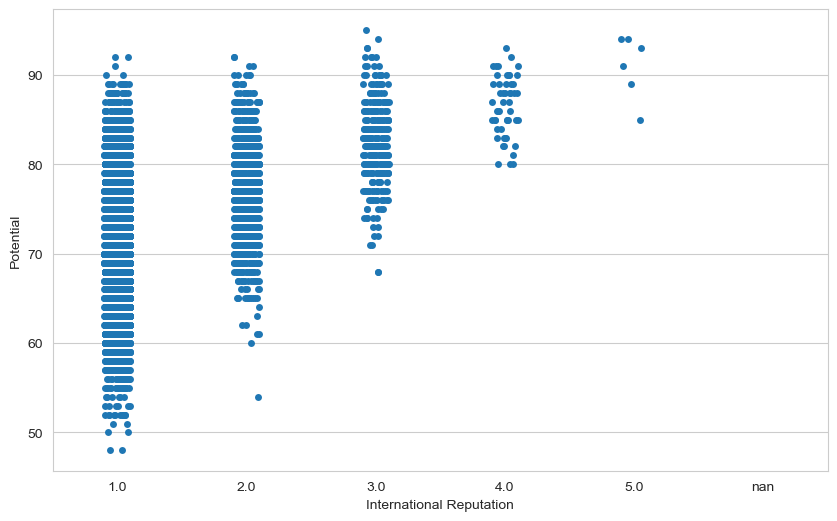

In [23]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(data= fifa , x= 'International Reputation',y='Potential')
plt.show()

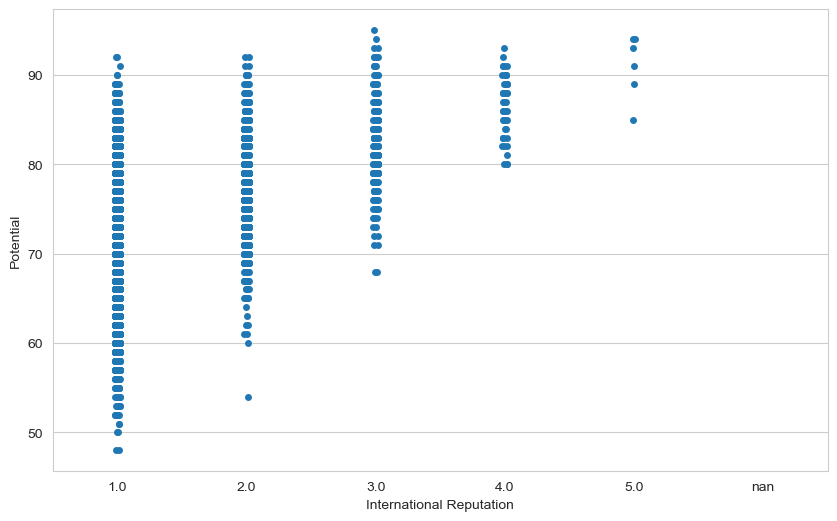

In [24]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(data= fifa , x= 'International Reputation',y='Potential',jitter=0.02)
plt.show()

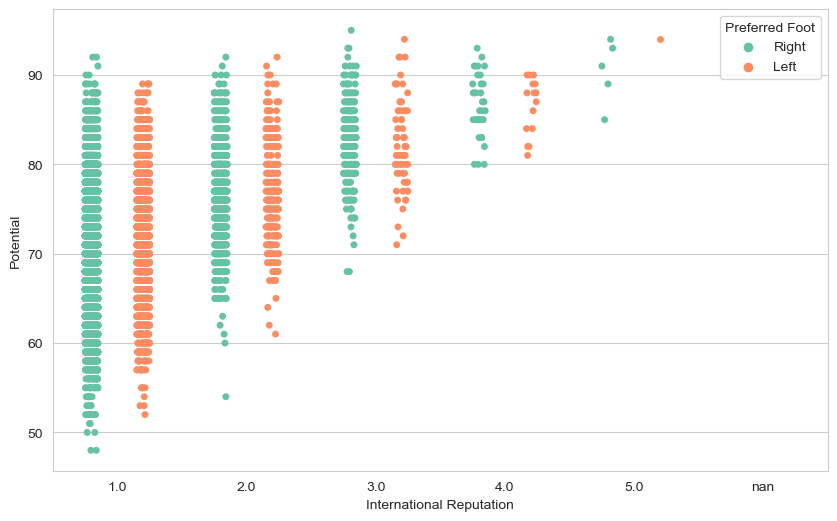

In [25]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(data= fifa , x= 'International Reputation',y='Potential',hue="Preferred Foot",palette="Set2" ,dodge=True)
plt.show()

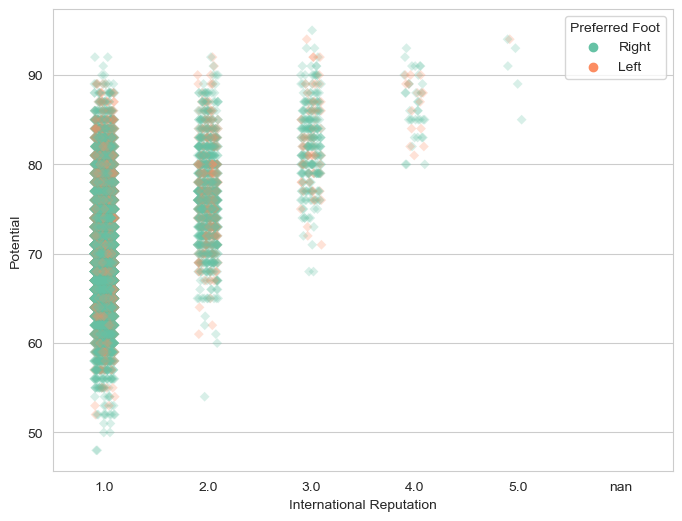

In [26]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.stripplot(data= fifa , x= 'International Reputation',y='Potential',hue="Preferred Foot",palette="Set2",marker='D',edgecolor='gray',alpha=.25)
plt.show()

# boxplot

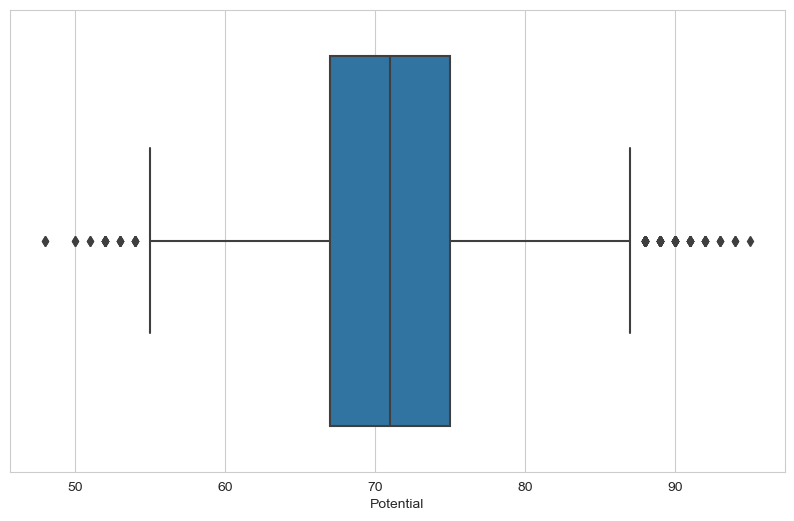

In [27]:
f,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x=fifa['Potential'])
plt.show()

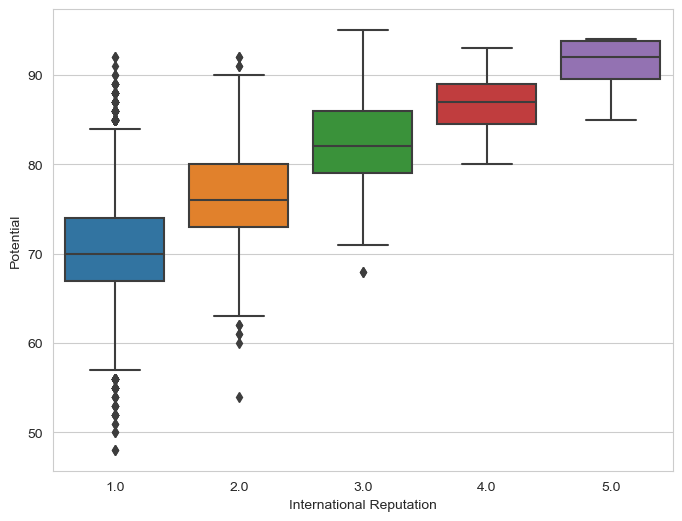

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

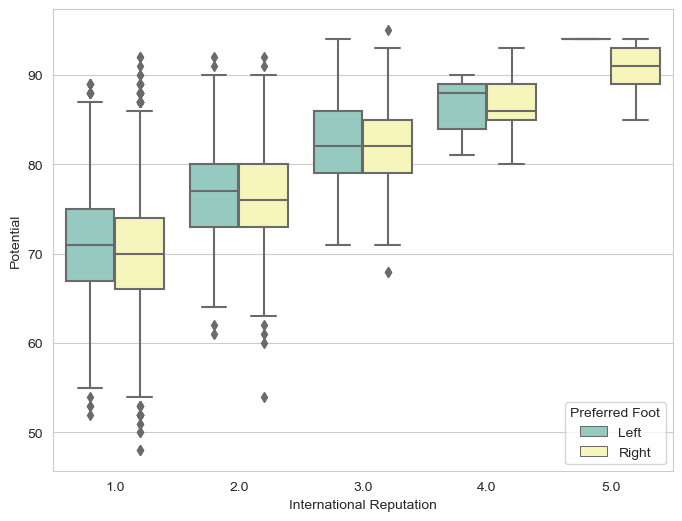

In [29]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa,palette="Set3",hue="Preferred Foot")
plt.show()

# violinplot()

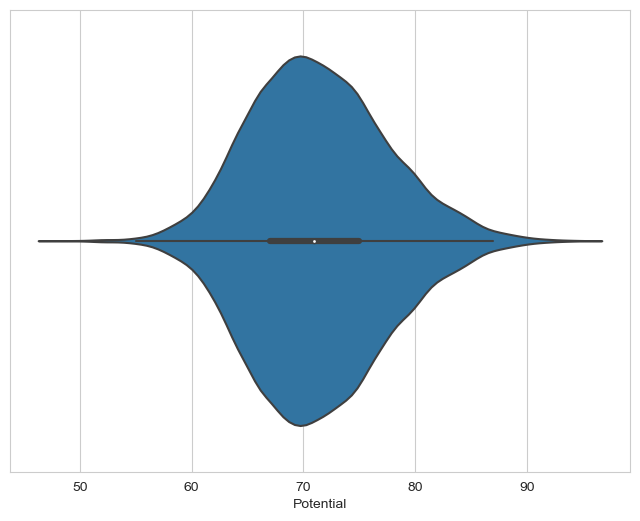

In [30]:
f, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa['Potential'])
plt.show()

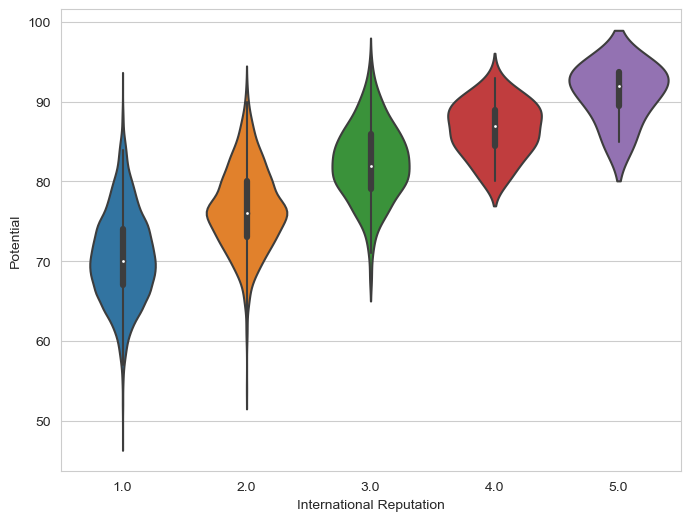

In [31]:
f, ax = plt.subplots(figsize=(8,6))
sns.violinplot(y='Potential',x= 'International Reputation',data=fifa)
plt.show()

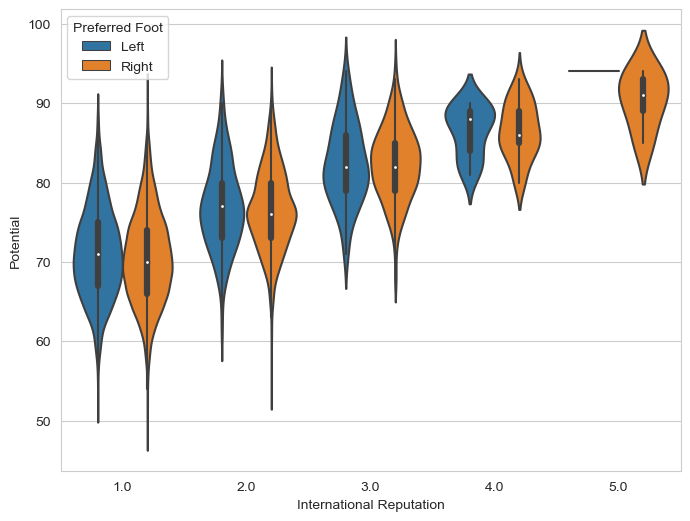

In [32]:
f, ax = plt.subplots(figsize=(8,6))
sns.violinplot(y='Potential',x= 'International Reputation',data=fifa,hue='Preferred Foot',Palette='muted')
plt.show()

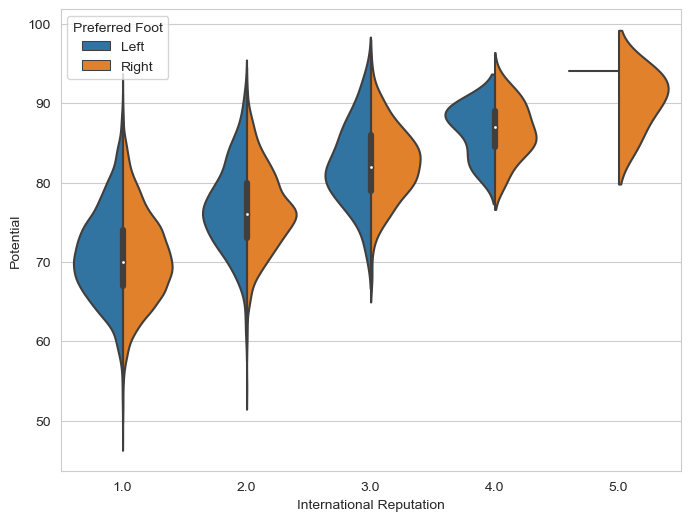

In [33]:
f, ax = plt.subplots(figsize=(8,6))
sns.violinplot(y='Potential',x= 'International Reputation',data=fifa,hue='Preferred Foot',Palette='muted',split=True)
plt.show()

## pointplot()

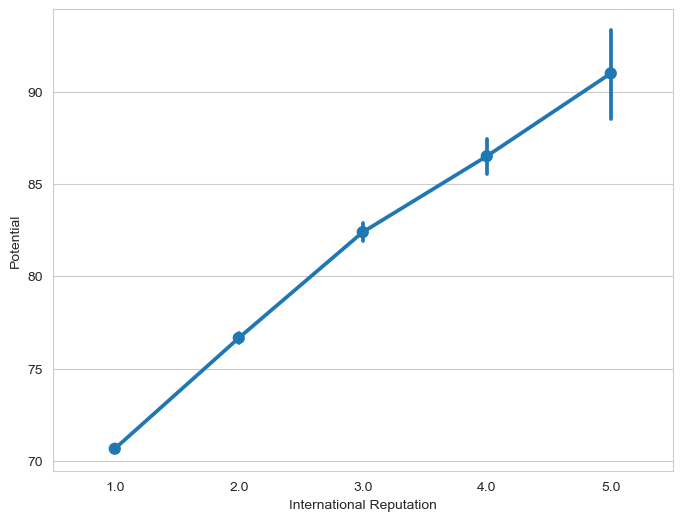

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

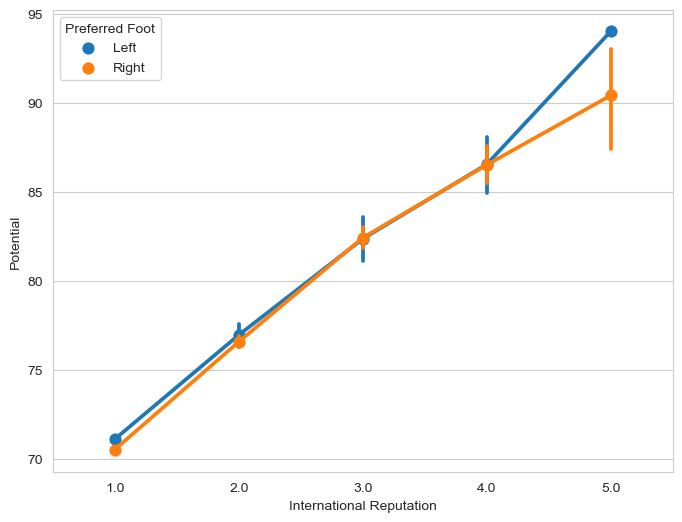

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential",hue='Preferred Foot', data=fifa)
plt.show()

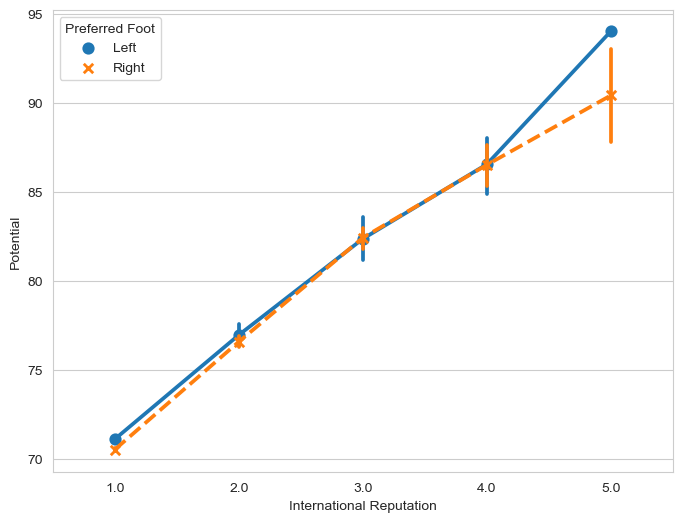

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

### Barplot

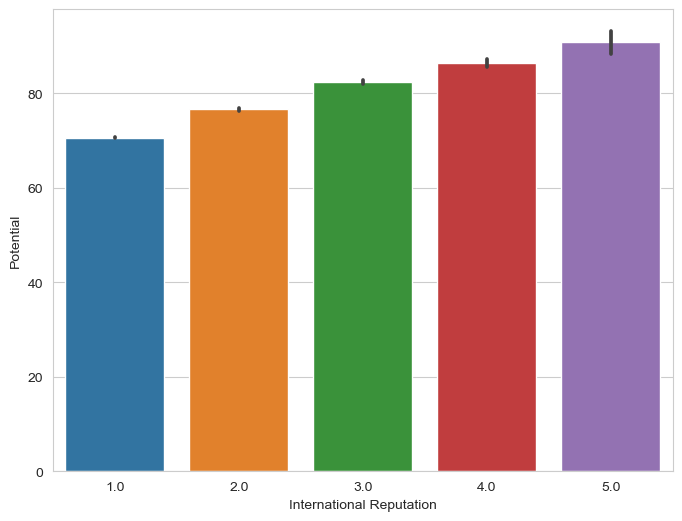

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa)
plt.show()

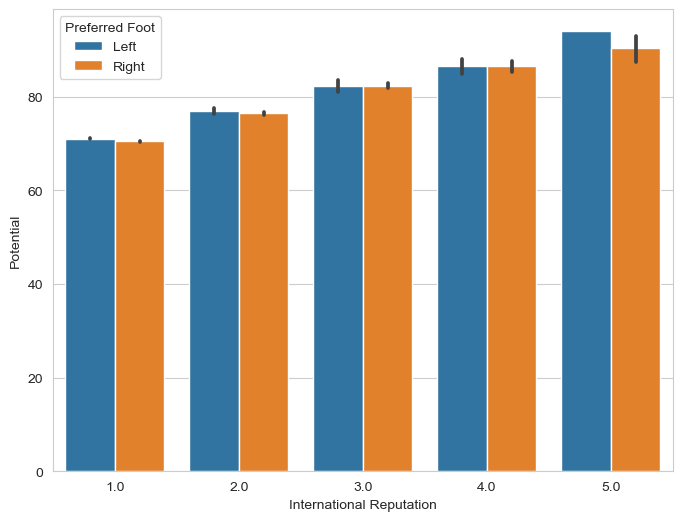

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa)
plt.show()

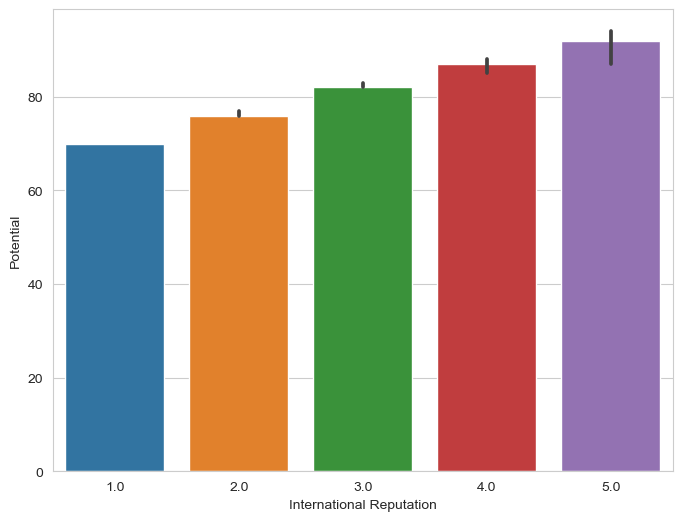

In [48]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, estimator=median)
plt.show()

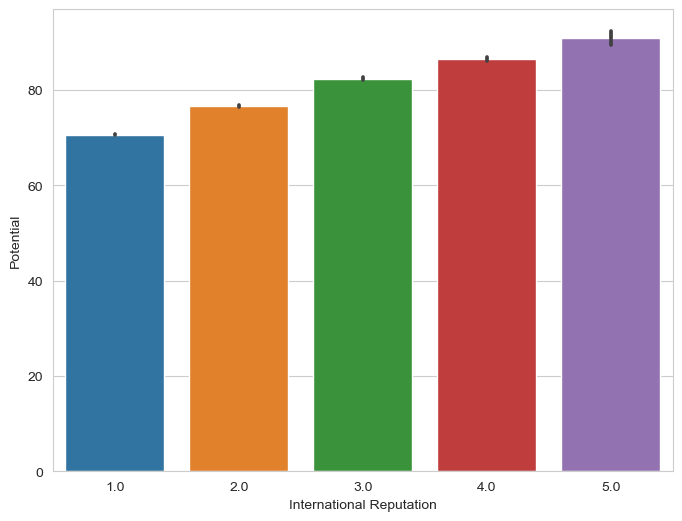

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci=68)
plt.show()

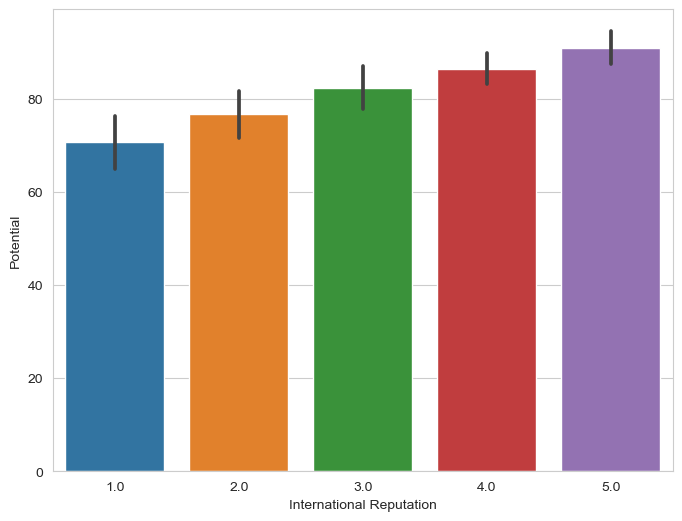

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, ci='sd')
plt.show()

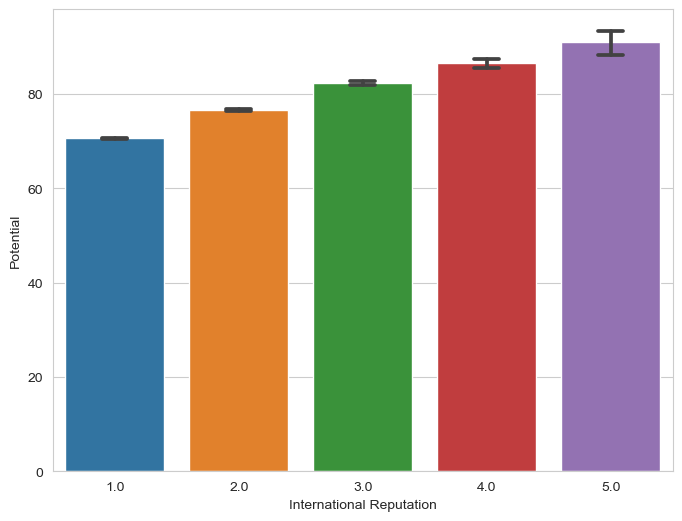

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa, capsize=0.2)
plt.show()

# relplot()

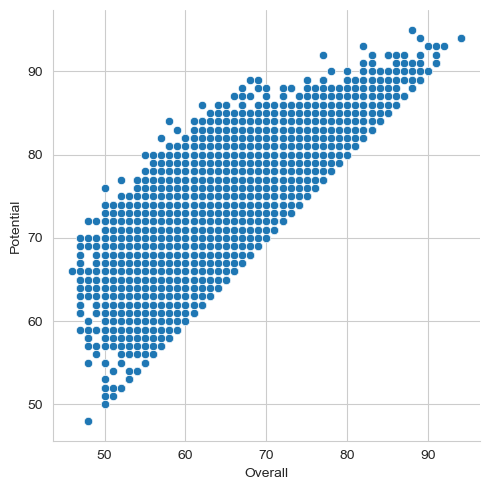

In [55]:
g = sns.relplot(x="Overall", y="Potential", data=fifa)

## scatterplot

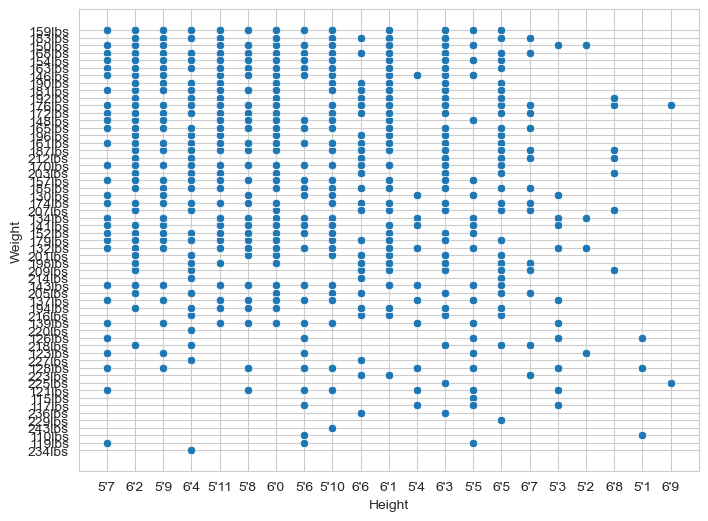

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa)
plt.show()

## lineplot()

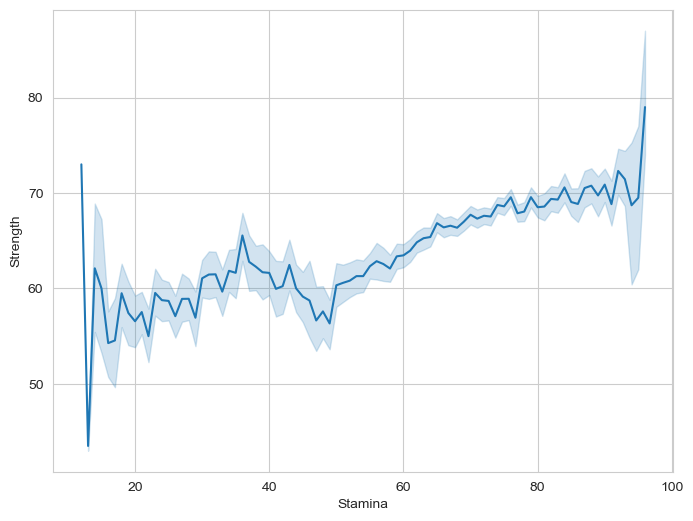

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa)
plt.show()

### regplot()

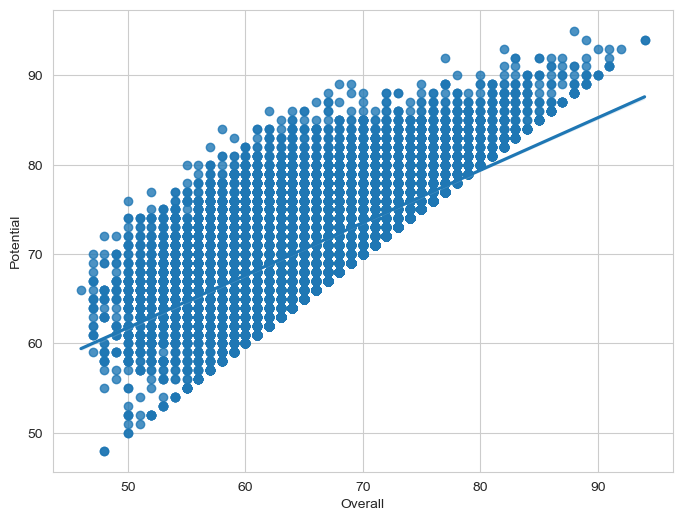

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)
plt.show()

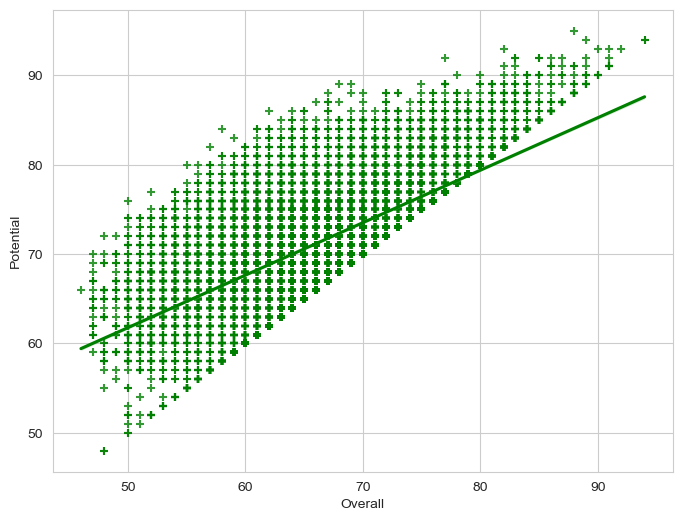

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa, color= "g", marker="+")
plt.show()

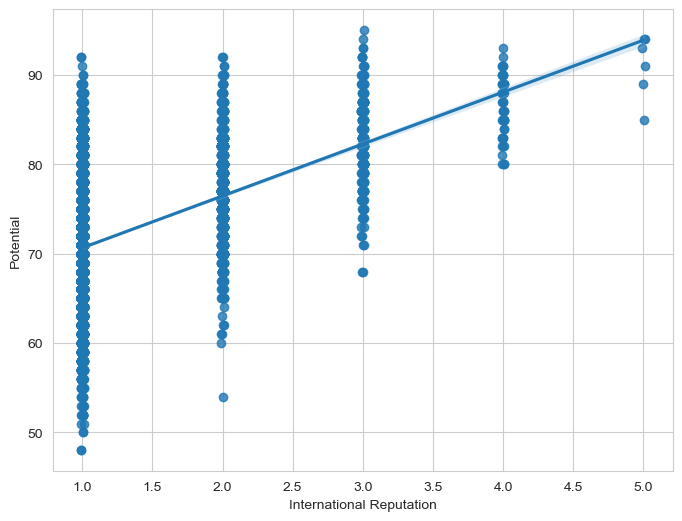

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa, x_jitter=.01)
plt.show()

#### lmplot()
* This function plots data and regression model fit across a facetgrid.
* This function combines regplot() and FacetGrid
* It is intendend as a convenient interface to fit regression models across conditional subsets of a dataset.
* we can plot a linear regression model between Overall and Potential variable with lmplot() function as follows:

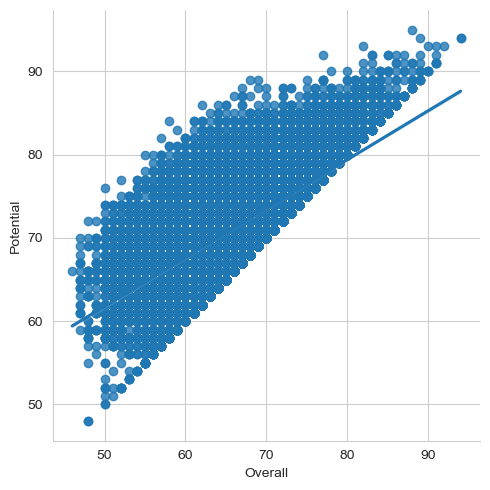

In [62]:
g = sns.lmplot(x='Overall',y='Potential',data=fifa)

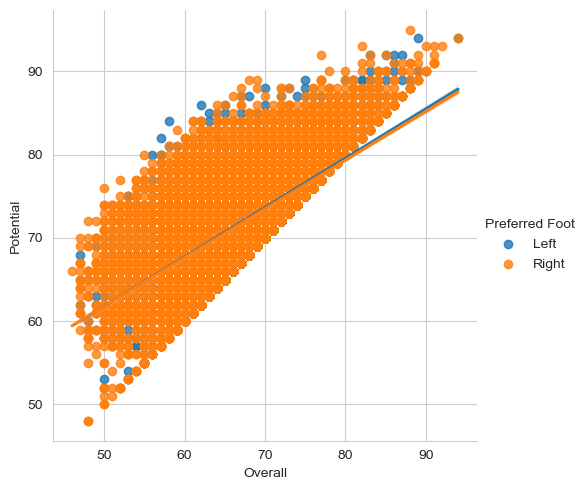

In [63]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa)

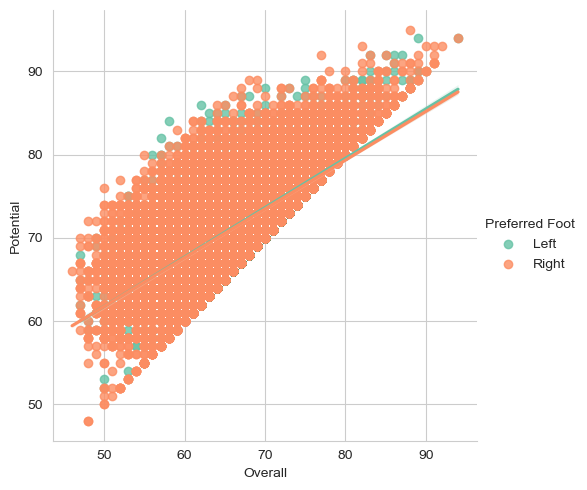

In [66]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa, palette="Set2")

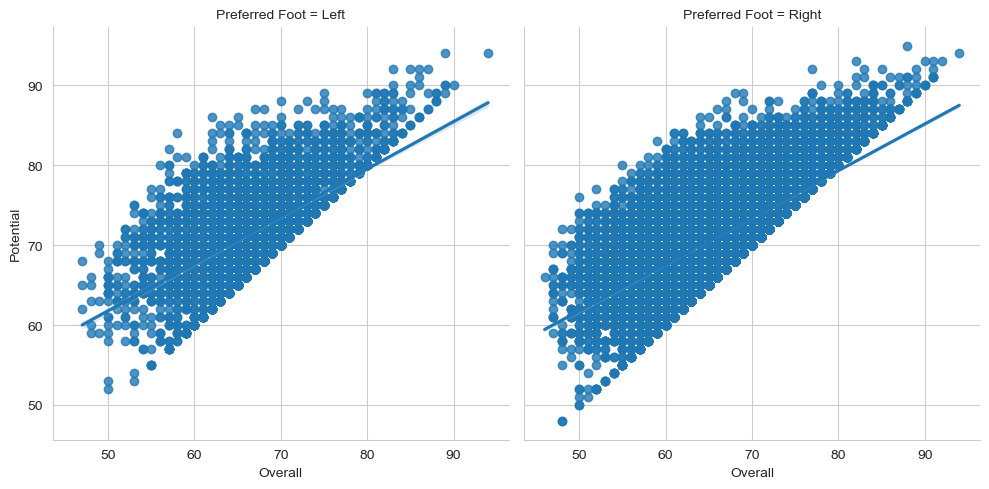

In [67]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa)

## FacetGrid

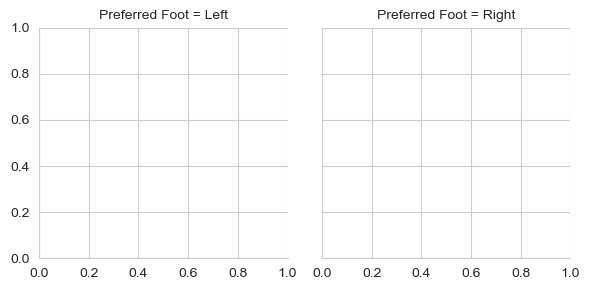

In [69]:
g = sns.FacetGrid(fifa, col="Preferred Foot")

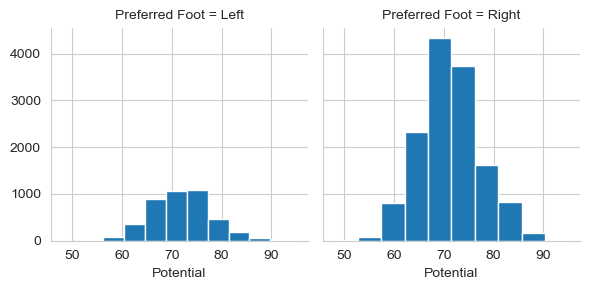

In [70]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = g.map(plt.hist, "Potential")

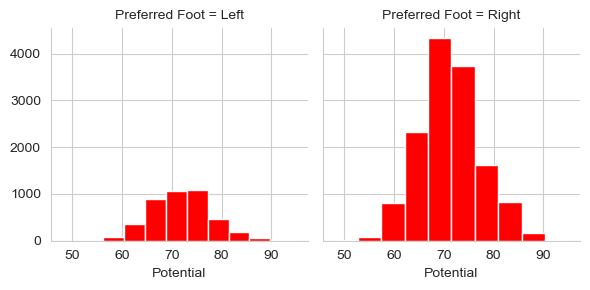

In [71]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = g.map(plt.hist, "Potential",bins=10,color='r')

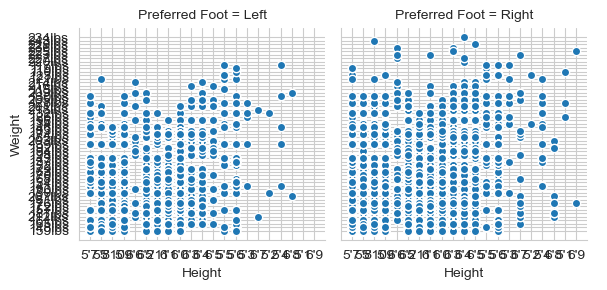

In [73]:
g = sns.FacetGrid(fifa, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

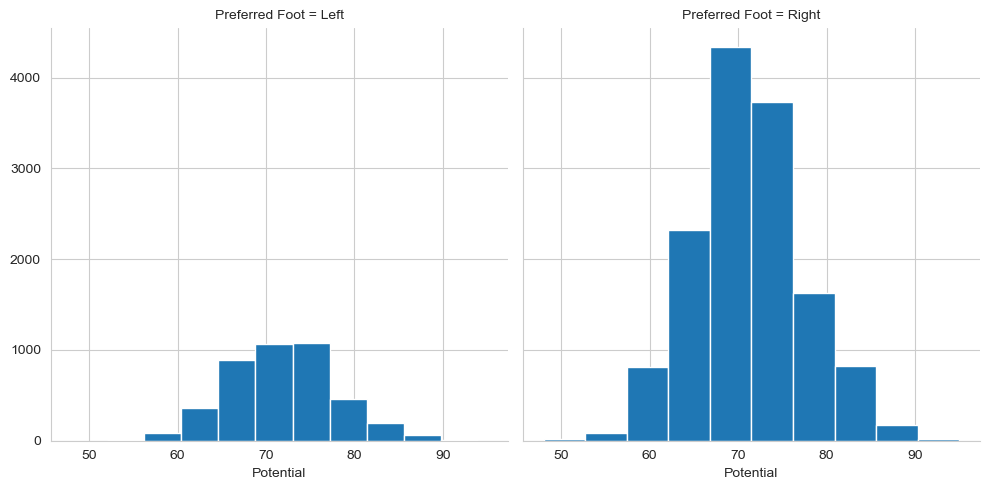

In [75]:
g = sns.FacetGrid(fifa, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")

## pairgrid()

In [76]:
fifa_new = fifa[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

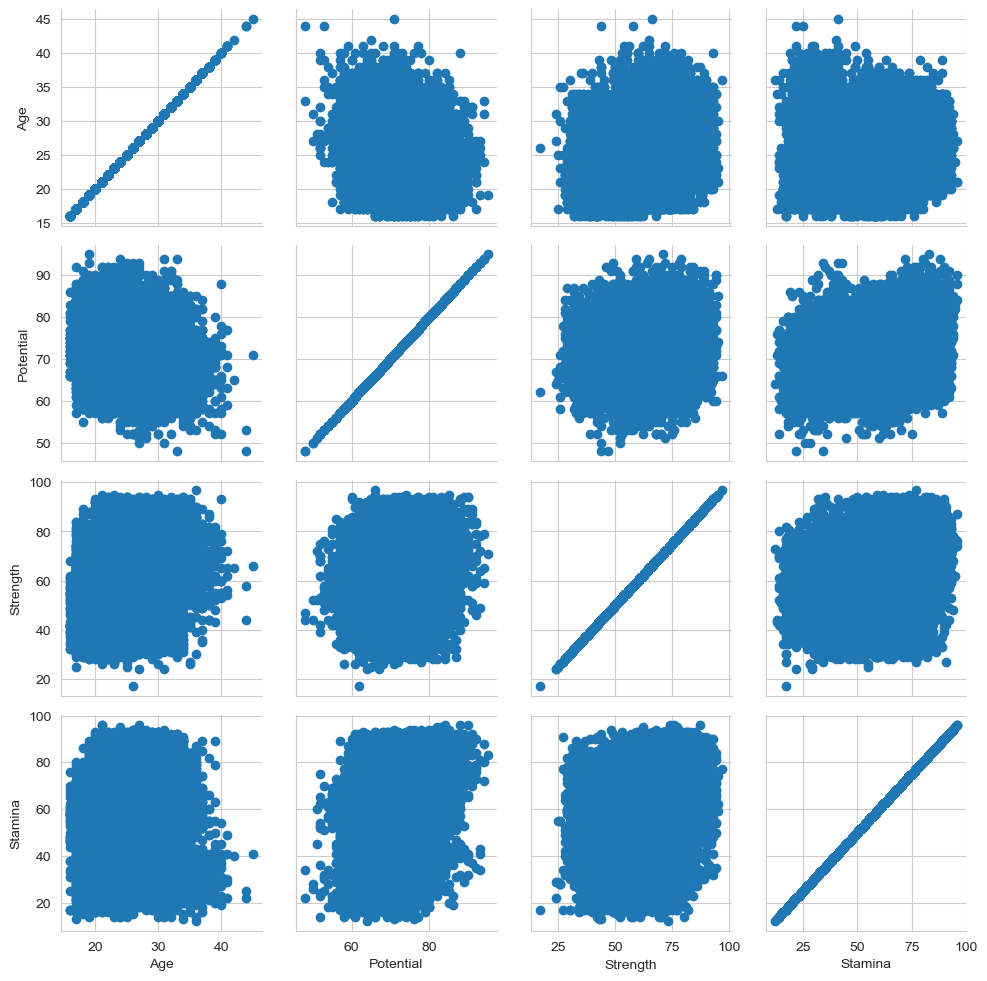

In [77]:
g = sns.PairGrid(fifa_new)
g = g.map(plt.scatter)

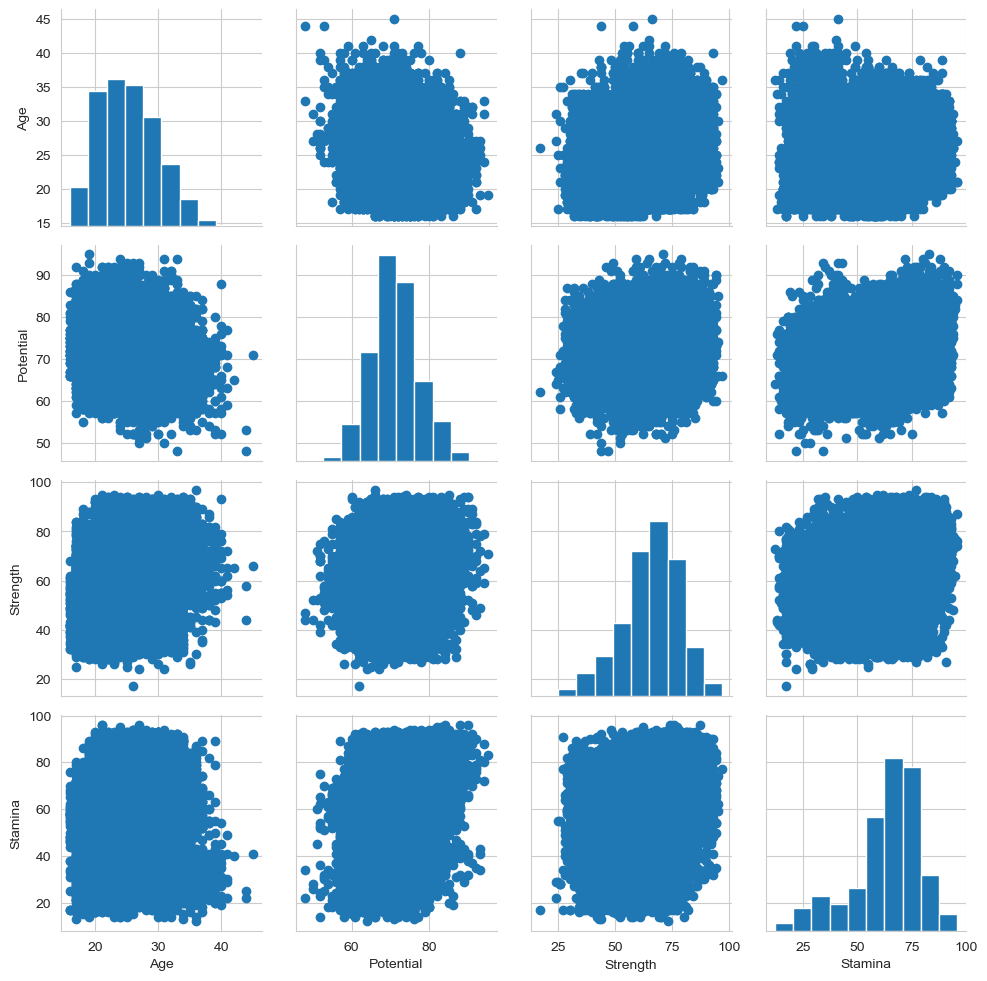

In [78]:
g = sns.PairGrid(fifa_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

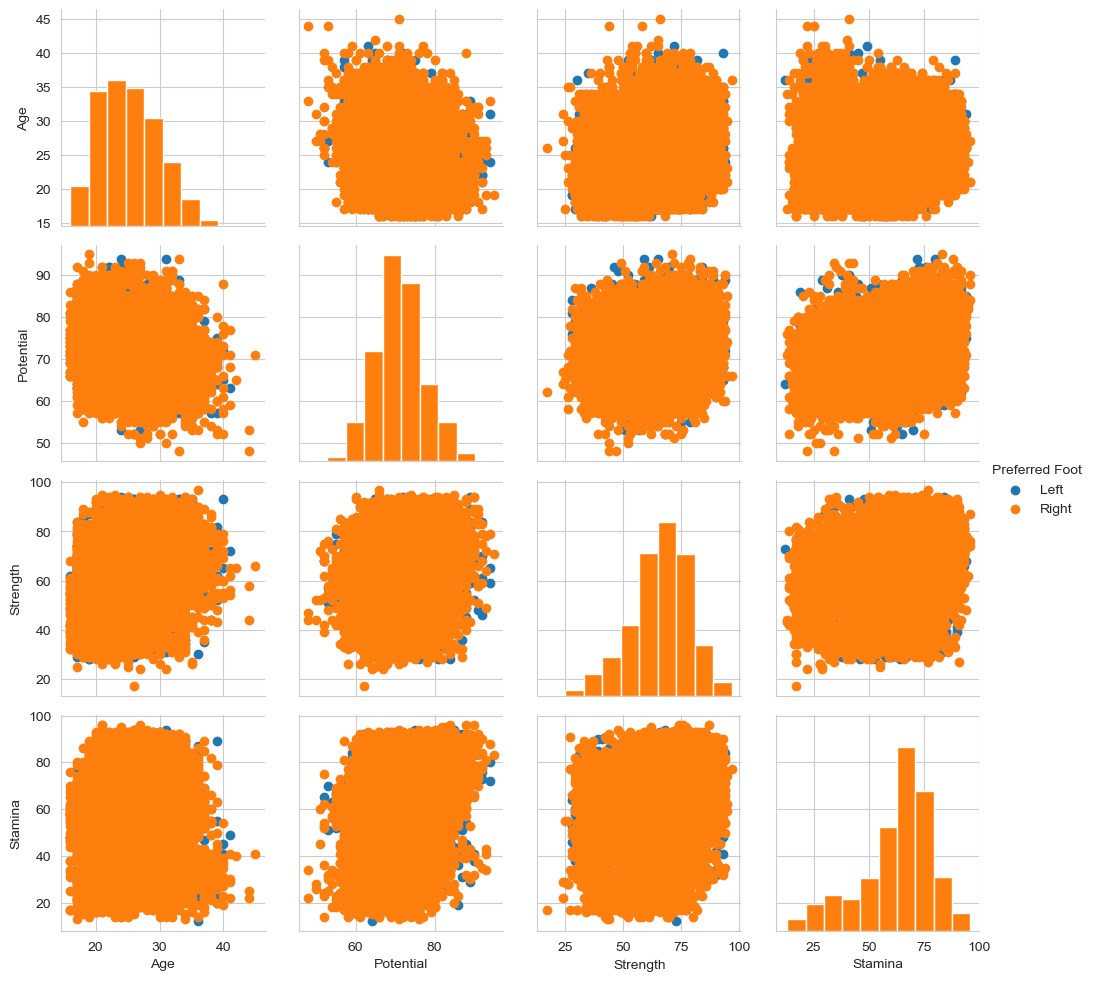

In [79]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()


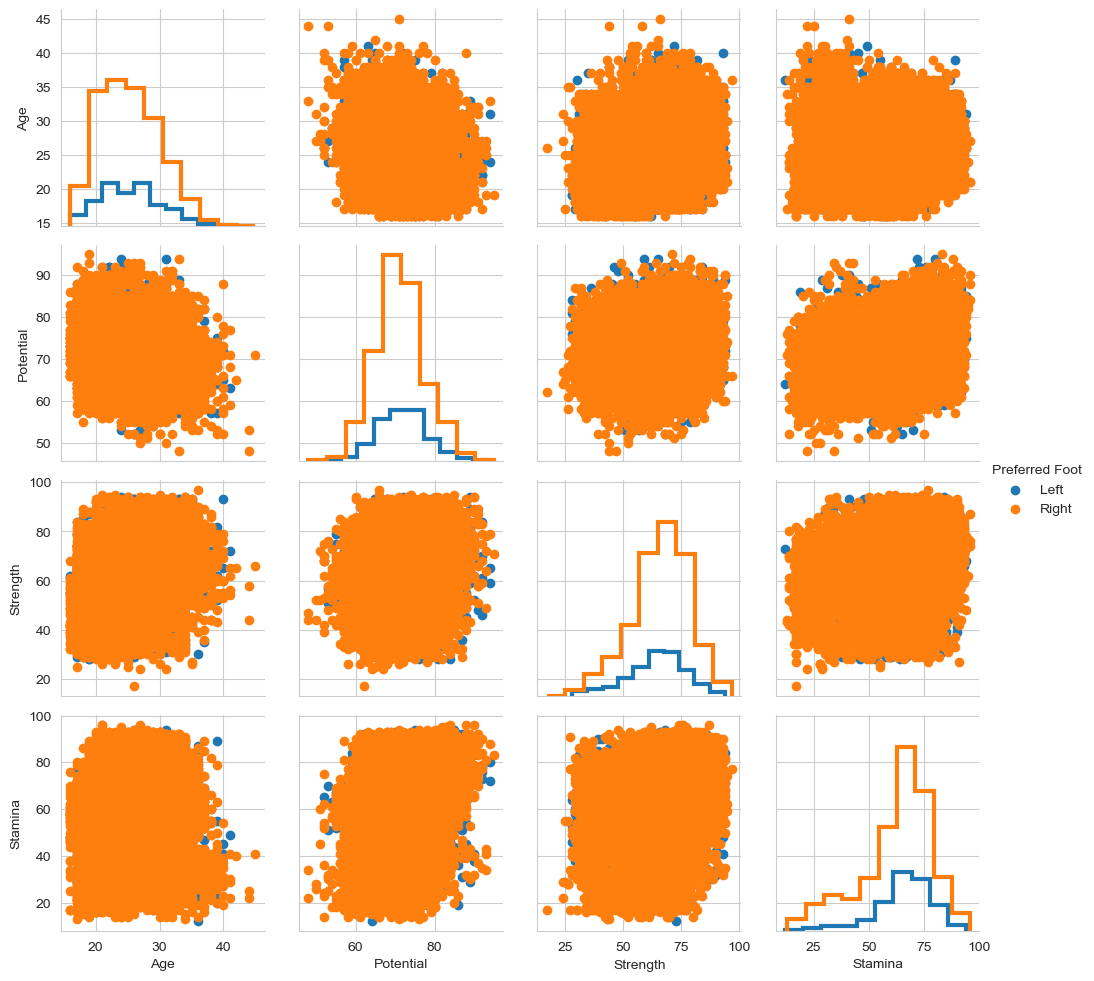

In [81]:
g = sns.PairGrid(fifa_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

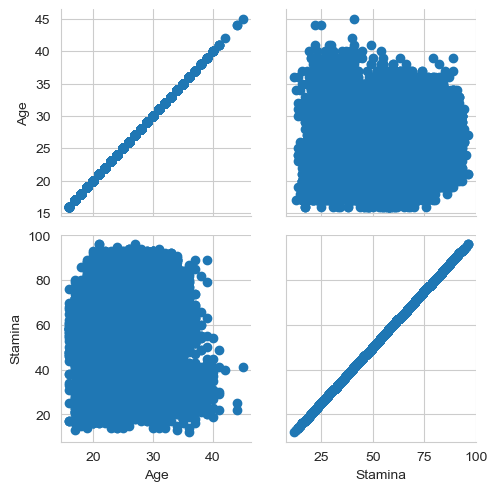

In [82]:
g = sns.PairGrid(fifa_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)

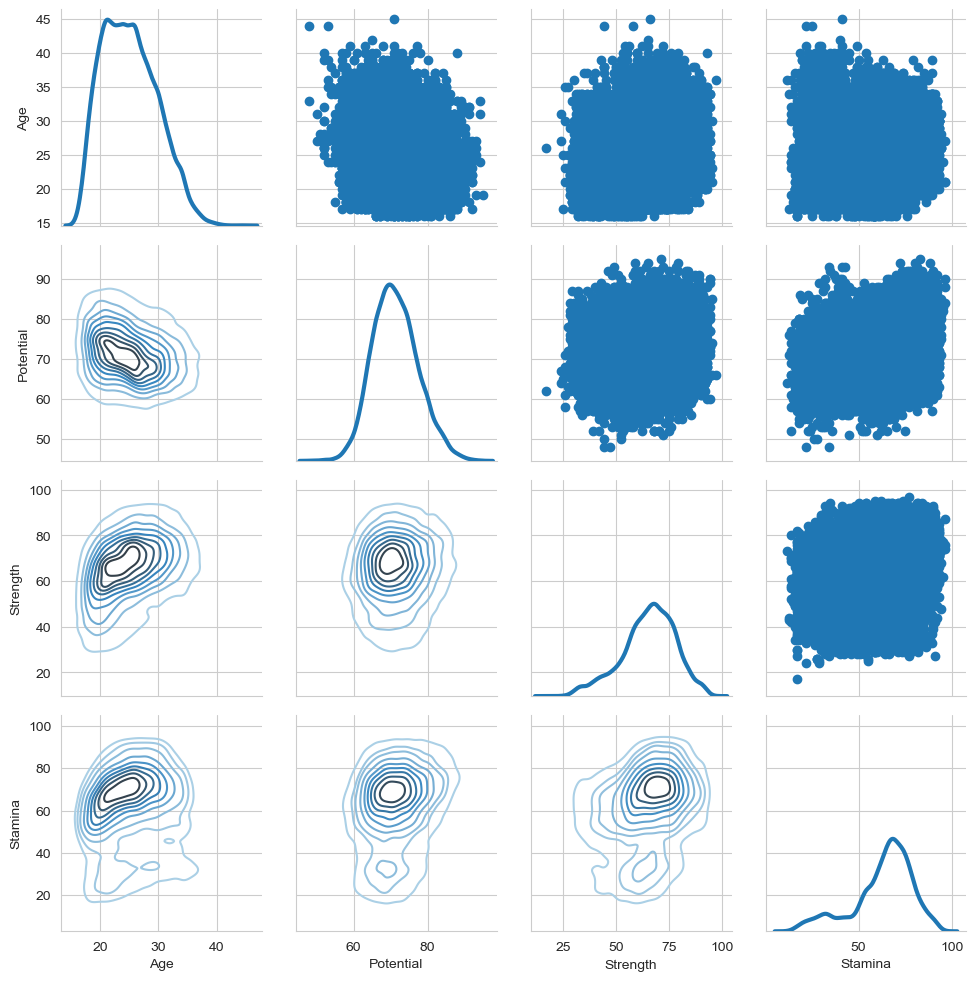

In [84]:
g = sns.PairGrid(fifa_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

## jointplot()

* This function provides a grid for drawijng a bivariate plot with marginal univariate plots.
* It set up the grid of subplots.

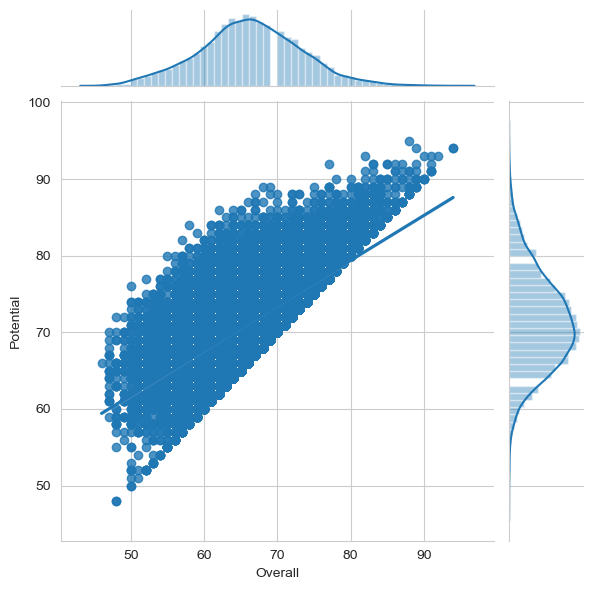

In [87]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot(sns.regplot, sns.distplot)

In [88]:
import matplotlib.pyplot as plt

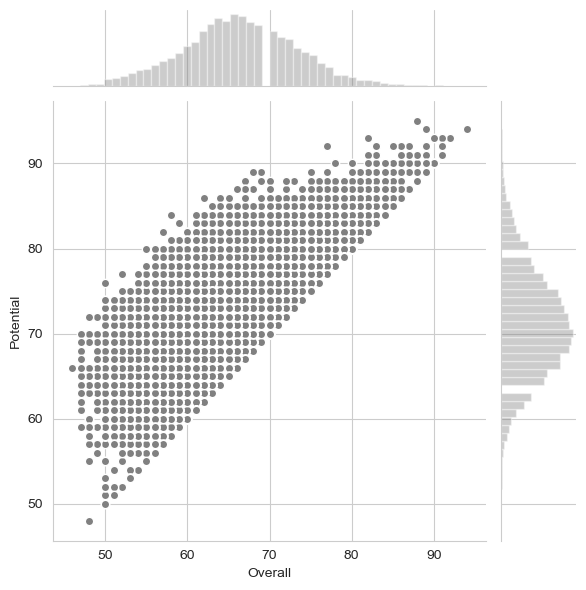

In [90]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

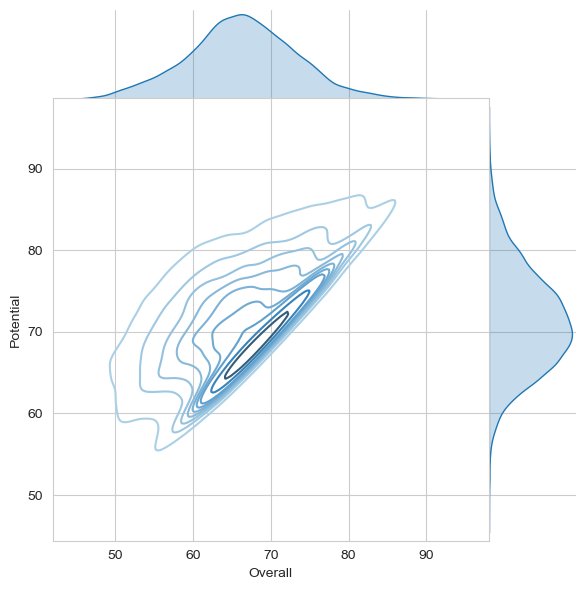

In [91]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

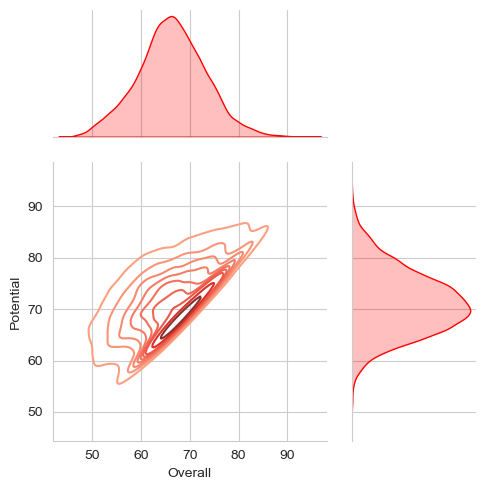

In [93]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

## regplot()

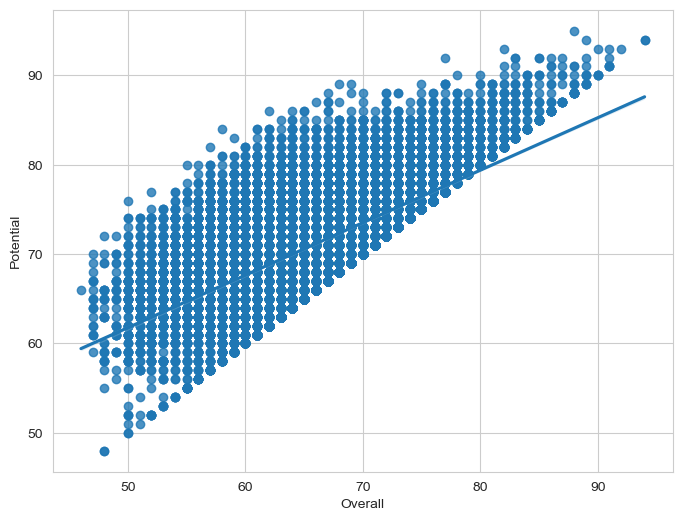

In [94]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa)

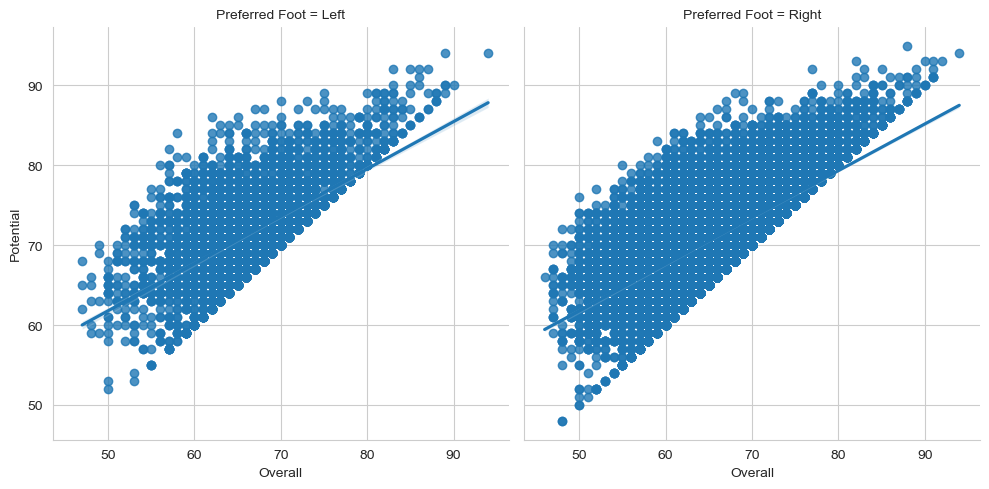

In [95]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa, col_wrap=2, height=5, aspect=1)

### sinplot()

In [96]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

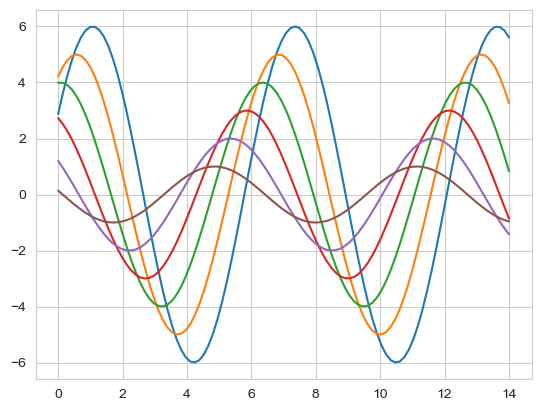

In [97]:
sinplot()

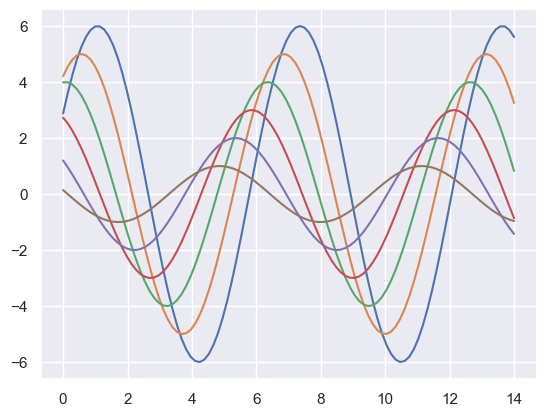

In [98]:
sns.set()
sinplot()

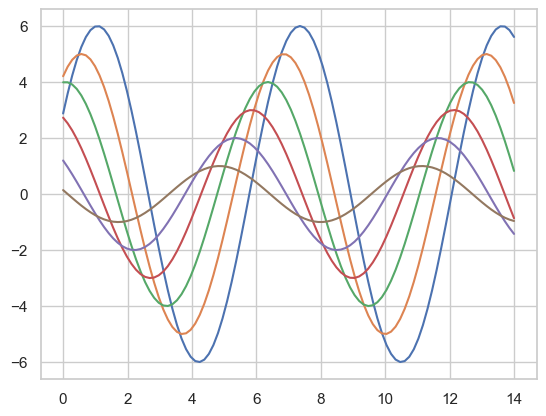

In [99]:
sns.set_style("whitegrid")
sinplot()

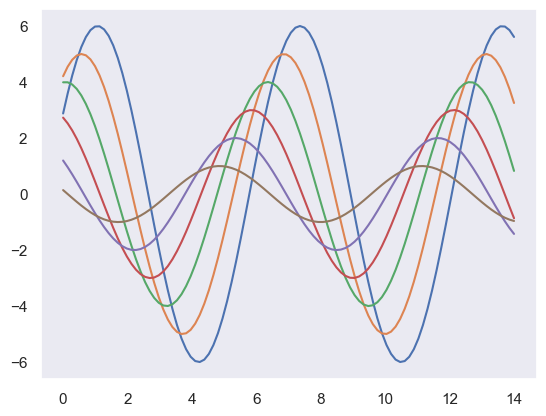

In [100]:
sns.set_style("dark")
sinplot()

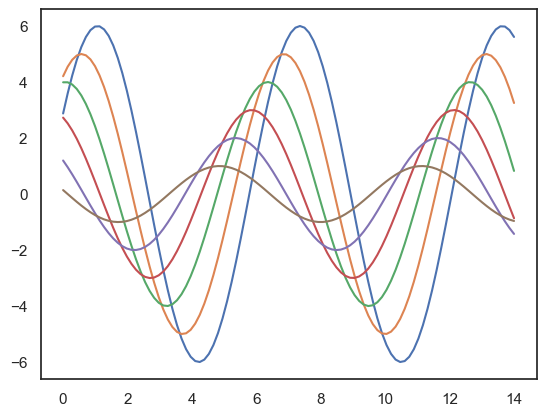

In [101]:
sns.set_style("white")
sinplot()

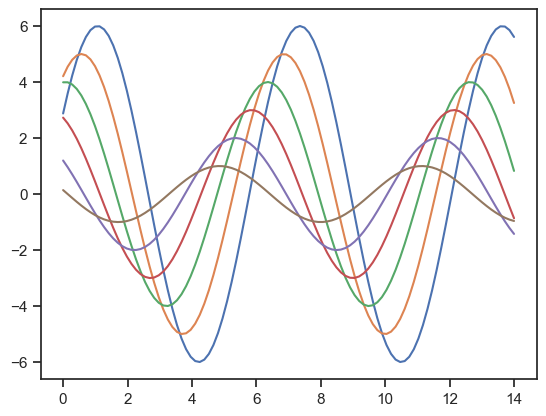

In [102]:
sns.set_style("ticks")
sinplot()